# Rule Curves for Rainy and Namakan Lakes

In [1]:
# Display graphics inline with the notebook
%matplotlib notebook

# Standard Python modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import os
import datetime

# Modules to display images and data tables
from IPython.display import Image
from IPython.core.display import display

# directories
dir = '../data/'
img = '../images/'

## Definitions

* The rule curves consist of upper and lower bounds on the levels of Namakan and Rainy Lakes during normal conditions. The 1970 Supplementary Order requires the dam operator, insofar as possible, keep the lake levels between these bounds. The 2000 Supplementary Order further requires the dam operators to target the middle of the rule curve bands.
* The 1970 Supplementary Order defines emergency conditions for Namakan and Rainy Lakes. A high water emergency conditions exists if a lake level exceeds a specified elevation when inflows are greater than the dam outflow capacity. The low water emergency condition occurs if the lake level falls below a threshold elevation when the lake outflow is below a specified minimum.
* The 2000 Supplementary Order further specifies 'drought lines' for both lakes. Dam operators may further restrict outflow when lake levels fall below the drought line.
* The 1970 Supplementary Order specified a threshold high water level for each lake such that, if the lake level exceeds the threshold, the dam operators must open all gates and fishways.

## <a name=section01></a>1970 Rule Curves for Rainy and Namakan Lakes

Text of the [1970 Rule Curve](http://www.ijc.org/files/tinymce/uploaded/1970-07-29_IJC_Order.pdf) rule curve order

In [2]:
# Generic Year to represent data
yr = 2014

# Rainy Lake
RL1970  = {
    datetime.datetime(yr, 1, 1): [1104.6, 1106.6, 1107.1, 1108.1, 1108.6],
    datetime.datetime(yr, 2, 1): [1104.6, 1105.8, 1106.6, 1108.1, 1108.6],
    datetime.datetime(yr, 3, 1): [1104.6, 1105.2, 1106.2, 1108.1, 1108.6],
    datetime.datetime(yr, 4, 1): [1104.6, 1104.6, 1105.6, 1108.1, 1108.6],
    datetime.datetime(yr, 4,21): [1104.6, 1104.6, 1106.2, 1108.1, 1108.6],
    datetime.datetime(yr, 5, 1): [1104.6, 1105.1, 1106.6, 1108.1, 1108.6],
    datetime.datetime(yr, 6, 1): [1104.6, 1106.6, 1107.6, 1108.1, 1108.6],
    datetime.datetime(yr, 7, 1): [1104.6, 1107.4, 1108.1, 1108.1, 1108.6],
    datetime.datetime(yr, 8, 1): [1104.6, 1107.4, 1108.1, 1108.1, 1108.6],
    datetime.datetime(yr, 9, 1): [1104.6, 1107.4, 1108.1, 1108.1, 1108.6],
    datetime.datetime(yr,10, 1): [1104.6, 1107.4, 1108.1, 1108.1, 1108.6],
    datetime.datetime(yr,10,11): [1104.6, 1107.4, 1108.1, 1108.1, 1108.6],
    datetime.datetime(yr,11, 1): [1104.6, 1107.2, 1108.1, 1108.1, 1108.6],
    datetime.datetime(yr,12, 1): [1104.6, 1106.8, 1107.6, 1108.1, 1108.6],
    datetime.datetime(yr,12,31): [1104.6, 1106.4, 1107.1, 1108.1, 1108.6]
}

RL1970 = pd.DataFrame.from_dict(RL1970).transpose()/3.2808
RL1970.columns = ['ELW','LRC','URC','EHW','AGO']

# print rule curve in format portable to Simulink 1D Table Lookup
print "Breakpoints: ", RL1970.index.dayofyear, "\n"
print "LRC: [" + ", ".join(["{0:.2f}".format(d) for d in RL1970['LRC']]) + "]\n"
print "URC: [" + ", ".join(["{0:.2f}".format(d) for d in RL1970['URC']]) + "]\n"

RL1970 = RL1970.resample(rule='1D').interpolate()

# Namakan Lake
NL1970 = {    
    datetime.datetime(yr, 1, 1): [1108.6, 1113.6, 1115.3, 1118.6, 1119.1],
    datetime.datetime(yr, 2, 1): [1108.6, 1111.9, 1114.1, 1118.6, 1119.1],
    datetime.datetime(yr, 3, 1): [1108.6, 1110.3, 1113.1, 1118.6, 1119.1],
    datetime.datetime(yr, 4, 1): [1108.6, 1108.6, 1112.0, 1118.6, 1119.1],
    datetime.datetime(yr, 4,21): [1108.6, 1108.6, 1113.1, 1118.6, 1119.1],
    datetime.datetime(yr, 5, 1): [1108.6, 1110.2, 1113.6, 1118.6, 1119.1],
    datetime.datetime(yr, 6, 1): [1108.6, 1115.3, 1116.6, 1118.6, 1119.1],
    datetime.datetime(yr, 6,21): [1108.6, 1117.5, 1118.6, 1118.6, 1119.1],
    datetime.datetime(yr, 7, 1): [1108.6, 1117.6, 1118.6, 1118.6, 1119.1],
    datetime.datetime(yr, 7,21): [1108.6, 1118.0, 1118.6, 1118.6, 1119.1],
    datetime.datetime(yr, 8, 1): [1108.6, 1118.0, 1118.6, 1118.6, 1119.1],
    datetime.datetime(yr, 9, 1): [1108.6, 1118.0, 1118.6, 1118.6, 1119.1],
    datetime.datetime(yr, 9,11): [1108.6, 1118.0, 1118.6, 1118.6, 1119.1],
    datetime.datetime(yr,10, 1): [1108.6, 1117.6, 1118.6, 1118.6, 1119.1],
    datetime.datetime(yr,11, 1): [1108.6, 1116.3, 1117.5, 1118.6, 1119.1],
    datetime.datetime(yr,12, 1): [1108.6, 1115.0, 1116.5, 1118.6, 1119.1],
    datetime.datetime(yr,12,31): [1108.6, 1113.6, 1115.3, 1118.6, 1119.1]
}

NL1970 = pd.DataFrame.from_dict(NL1970).transpose()/3.2808
NL1970.columns = ['ELW','LRC','URC','EHW','AGO']
NL1970 = NL1970.resample(rule='1D').interpolate()

Breakpoints:  [  1  32  60  91 111 121 152 182 213 244 274 284 305 335 365] 

LRC: [337.30, 337.05, 336.87, 336.69, 336.69, 336.84, 337.30, 337.54, 337.54, 337.54, 337.54, 337.54, 337.48, 337.36, 337.23]

URC: [337.45, 337.30, 337.17, 336.99, 337.17, 337.30, 337.60, 337.75, 337.75, 337.75, 337.75, 337.75, 337.75, 337.60, 337.45]



/Users/jeff/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
/Users/jeff/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:56: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)


<IPython.core.display.Javascript object>


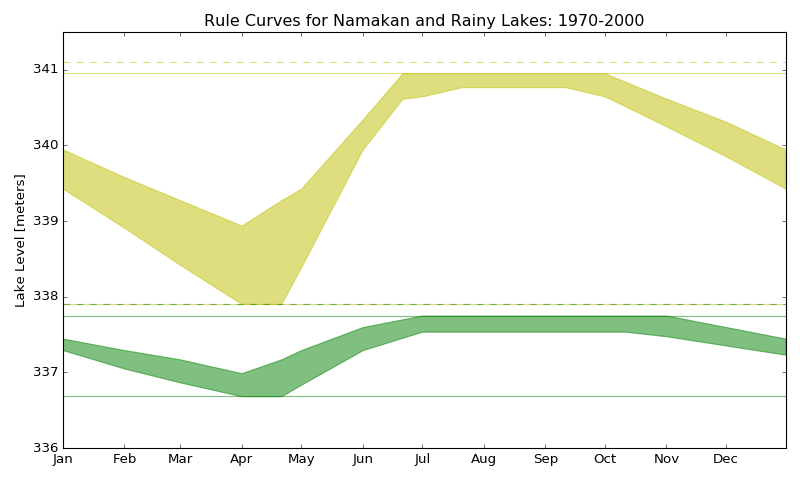

In [3]:
# Plot 1970 Rule Curves

plt.figure(figsize=(10,6))
plt.hold(True)
plt.plot(NL1970.index,NL1970['EHW'],color='y',alpha=0.5)
plt.plot(NL1970.index,NL1970['ELW'],color='y',alpha=0.5)
plt.plot(NL1970.index,NL1970['AGO'],'y--',alpha=0.5)
plt.plot(RL1970.index,RL1970['EHW'],color='g',alpha=0.5)
plt.plot(RL1970.index,RL1970['ELW'],color='g',alpha=0.5)
plt.plot(RL1970.index,RL1970['AGO'],'g--',alpha=0.5)

plt.fill_between(NL1970.index,
                 NL1970['LRC'].tolist(),
                 NL1970['URC'].tolist(),
                 color='y', alpha='0.5')

plt.fill_between(RL1970.index,
                 RL1970['LRC'].tolist(),
                 RL1970['URC'].tolist(),
                 color='g', alpha='0.5')

plt.ylabel('Lake Level [meters]')
plt.ylim(336,341.5)
plt.title('Rule Curves for Namakan and Rainy Lakes: 1970-2000')
plt.hold(False)

import matplotlib.dates as mdates

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()

## <a name=section02></a>2000 Rule Curves for Rainy and Namakan Lakes

The [2001 Consolidated Order](http://www.ijc.org/files/tinymce/uploaded/2001-01-18_IJC_Order.pdf) of the International Joint Commission establishes the rule curves for Namakan and Rainy Lakes, and operating constraints for the dams at Kettle Falls and International Falls. The consolidated order incorporates relevant language from the original [Order of 1949](http://www.ijc.org/files/tinymce/uploaded/1949-06-08_IJC_Order.pdf) and Supplemental Orders of [1957](http://www.ijc.org/files/tinymce/uploaded/1957-10-01_IJC_Order.pdf), [1970](http://www.ijc.org/files/tinymce/uploaded/1970-07-29_IJC_Order.pdf), and [2000](http://www.ijc.org/files/tinymce/uploaded/2000-01-05_IJC_Order.pdf), into a single document describing current regulations on the management of levels for Rainy Lake and the Namakan chain of lakes.

### Namakan Lake Rule Curve 2000

In [4]:
# Namakan Lake

ELW = {
    datetime.datetime(yr, 1, 1): 337.90,
    datetime.datetime(yr,12,31): 337.90
}

EDL = {
    datetime.datetime(yr, 1, 1): 338.95,
    datetime.datetime(yr, 6,30): 338.95,
    datetime.datetime(yr, 7, 1): 340.15,
    datetime.datetime(yr, 9,30): 340.15,
    datetime.datetime(yr,12,31): 338.95
}

LRC = {
    datetime.datetime(yr, 1, 1): 339.70,
    datetime.datetime(yr, 4, 1): 338.95,
    datetime.datetime(yr, 4,15): 338.95,
    datetime.datetime(yr, 6, 7): 340.70,
    datetime.datetime(yr, 9, 1): 340.45,
    datetime.datetime(yr,10, 1): 340.45,
    datetime.datetime(yr,12,31): 339.70
}

URC = {
    datetime.datetime(yr, 1, 1): 340.00,
    datetime.datetime(yr, 4, 1): 339.70,
    datetime.datetime(yr, 6, 1): 340.95,
    datetime.datetime(yr, 9, 1): 340.65,
    datetime.datetime(yr,10, 1): 340.65,
    datetime.datetime(yr,12,31): 340.00
}

EHW = {
    datetime.datetime(yr, 1, 1): 340.95,
    datetime.datetime(yr,12,31): 340.95
}

AGO = {
    datetime.datetime(yr, 1, 1): 341.10,
    datetime.datetime(yr,12,31): 341.10
}

NL2000 = pd.concat([pd.Series(ELW),pd.Series(EDL),pd.Series(LRC),
                    pd.Series(URC),pd.Series(EHW),pd.Series(AGO)], axis=1)
NL2000.columns = ['ELW','EDL','LRC','URC','EHW','AGO']
NL2000 = NL2000.resample(rule='1D').interpolate()

/Users/jeff/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:48: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)


### Rainy Lake Rule Curve 2000

/Users/jeff/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:52: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)


<IPython.core.display.Javascript object>


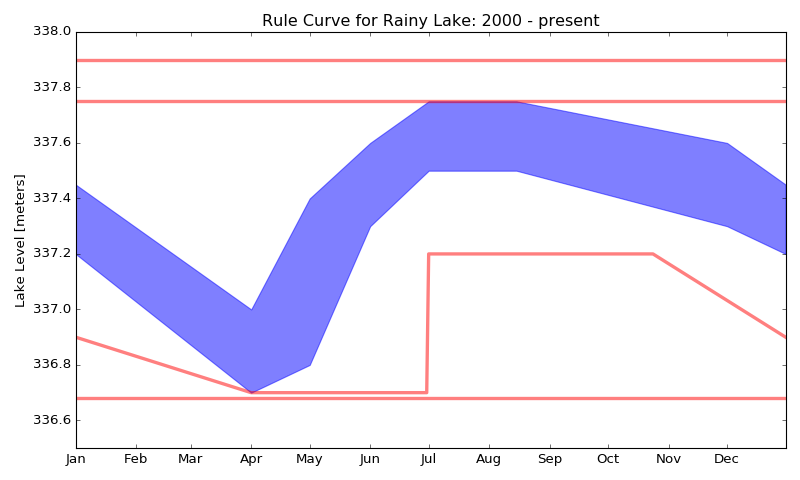

In [5]:
# Rainy Lake

ELW = {
    datetime.datetime(yr, 1, 1): 336.68,
    datetime.datetime(yr,12,31): 336.68
}

LRC = {
    datetime.datetime(yr, 1, 1): 337.20,
    datetime.datetime(yr, 4, 1): 336.70,
    datetime.datetime(yr, 5, 1): 336.80,
    datetime.datetime(yr, 6, 1): 337.30,
    datetime.datetime(yr, 7, 1): 337.50,
    datetime.datetime(yr, 8,15): 337.50,
    datetime.datetime(yr,12, 1): 337.30,
    datetime.datetime(yr,12,31): 337.20
}

URC = {
    datetime.datetime(yr, 1, 1): 337.45,
    datetime.datetime(yr, 4, 1): 337.00,
    datetime.datetime(yr, 5, 1): 337.40,
    datetime.datetime(yr, 6, 1): 337.60,
    datetime.datetime(yr, 7, 1): 337.75,
    datetime.datetime(yr, 8,15): 337.75,
    datetime.datetime(yr,12, 1): 337.60,
    datetime.datetime(yr,12,31): 337.45
}

EDL = {
    datetime.datetime(yr, 1, 1): 336.90,
    datetime.datetime(yr, 4, 1): 336.70,
    datetime.datetime(yr, 6,30): 336.70,
    datetime.datetime(yr, 7, 1): 337.20,
    datetime.datetime(yr,10,24): 337.20,
    datetime.datetime(yr,12,31): 336.90
}

EHW = {
    datetime.datetime(yr, 1, 1): 337.75,
    datetime.datetime(yr,12,31): 337.75
}

AGO = {
    datetime.datetime(yr, 1, 1): 337.90,
    datetime.datetime(yr,12,31): 337.90
}

RL2000 = pd.concat([pd.Series(ELW),pd.Series(LRC),pd.Series(URC),
                    pd.Series(EDL),pd.Series(EHW),pd.Series(AGO)], axis=1)
RL2000.columns = ['ELW','LRC','URC','EDL','EHW','AGO']
RL2000 = RL2000.resample(rule='1D').interpolate()

# Plot 2000 Rule Curves

plt.figure(figsize=(10,6))
plt.hold('True')

plt.plot(RL2000.index,RL2000['ELW'],color='r',lw=3,alpha=0.5)
plt.plot(RL2000.index,RL2000['EDL'],color='r',lw=3,alpha=0.5)
plt.plot(RL2000.index,RL2000['EHW'],color='r',lw=3,alpha=0.5)
plt.plot(RL2000.index,RL2000['AGO'],color='r',lw=3,alpha=0.5)

plt.fill_between(RL2000.index,
                 RL2000['LRC'].tolist(),
                 RL2000['URC'].tolist(),
                 color='b', alpha='0.5')
plt.hold('False')
plt.ylim(336.5,338)
plt.ylabel('Lake Level [meters]')
plt.title('Rule Curve for Rainy Lake: 2000 - present')

import matplotlib.dates as mdates

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.savefig(img + 'RuleCurve_RL2000.png')

<IPython.core.display.Javascript object>


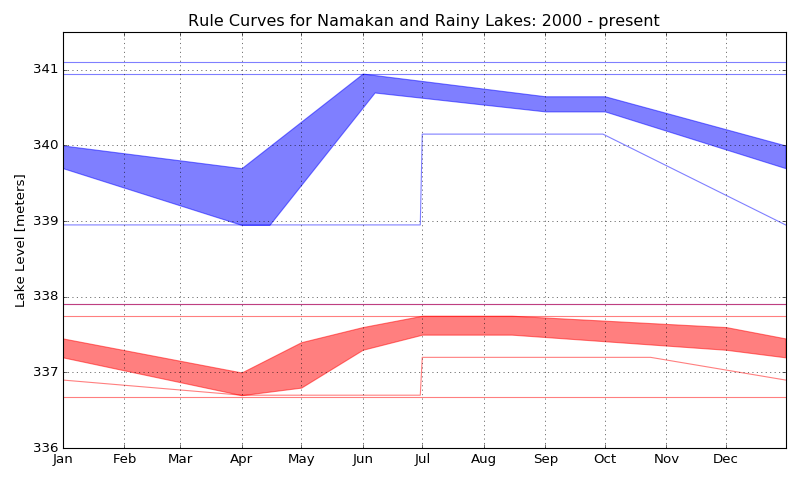

In [7]:
# Plot 2000 Rule Curves

plt.figure(figsize=(10,6))
plt.hold('True')
plt.plot(NL2000.index,NL2000['ELW'],color='b',alpha=0.5)
plt.plot(NL2000.index,NL2000['EDL'],color='b',alpha=0.5)
plt.plot(NL2000.index,NL2000['EHW'],color='b',alpha=0.5)
plt.plot(NL2000.index,NL2000['AGO'],color='b',alpha=0.5)

plt.plot(RL2000.index,RL2000['ELW'],color='r',alpha=0.5)
plt.plot(RL2000.index,RL2000['EDL'],color='r',alpha=0.5)
plt.plot(RL2000.index,RL2000['EHW'],color='r',alpha=0.5)
plt.plot(RL2000.index,RL2000['AGO'],color='r',alpha=0.5)

plt.fill_between(NL2000.index,
                 NL2000['LRC'].tolist(),
                 NL2000['URC'].tolist(),
                 color='b', alpha='0.5')

plt.fill_between(RL2000.index,
                 RL2000['LRC'].tolist(),
                 RL2000['URC'].tolist(),
                 color='r', alpha='0.5')
plt.hold('False')
plt.ylim(336,341.5)
plt.ylabel('Lake Level [meters]')
plt.title('Rule Curves for Namakan and Rainy Lakes: 2000 - present')

import matplotlib.dates as mdates

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.grid()

plt.tight_layout()

fname = img + 'RuleCurve2000.png'
plt.savefig(fname)
!convert $fname -trim $fname

## <a name=section03></a>Graphical Comparison of 1970 and 2000 Rule Curves

<IPython.core.display.Javascript object>


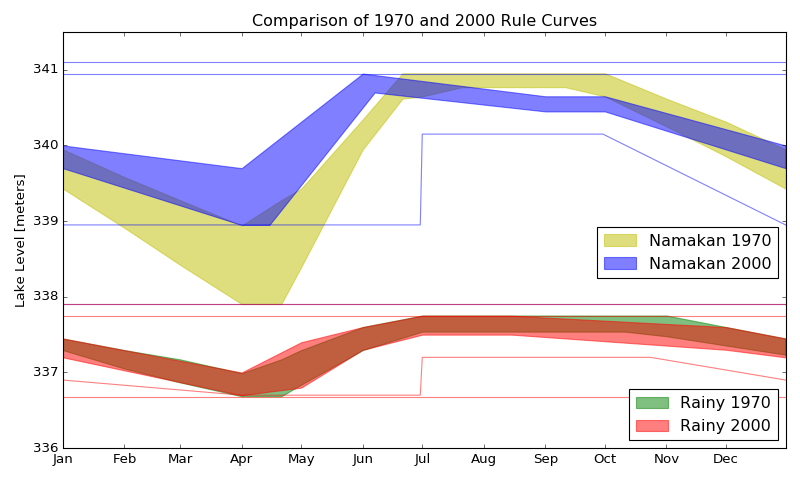

In [39]:
# Plot 1970 Rule Curves

plt.figure(figsize=(10,6))

plt.fill_between(NL1970.index,
                 NL1970['LRC'].tolist(),
                 NL1970['URC'].tolist(),
                 color='y', alpha='0.5')

plt.fill_between(RL1970.index,
                 RL1970['LRC'].tolist(),
                 RL1970['URC'].tolist(),
                 color='g', alpha='0.5')

plt.ylabel('Lake Level [meters]')
plt.title('Rule Curves for Namakan and Rainy Lakes: 1970-2000')
plt.tight_layout()

plt.hold('True')
plt.plot(NL2000.index,NL2000['ELW'],color='b',alpha=0.5)
plt.plot(NL2000.index,NL2000['EDL'],color='b',alpha=0.5)
plt.plot(NL2000.index,NL2000['EHW'],color='b',alpha=0.5)
plt.plot(NL2000.index,NL2000['AGO'],color='b',alpha=0.5)

plt.plot(RL2000.index,RL2000['ELW'],color='r',alpha=0.5)
plt.plot(RL2000.index,RL2000['EDL'],color='r',alpha=0.5)
plt.plot(RL2000.index,RL2000['EHW'],color='r',alpha=0.5)
plt.plot(RL2000.index,RL2000['AGO'],color='r',alpha=0.5)

plt.fill_between(NL2000.index,
                 NL2000['LRC'].tolist(),
                 NL2000['URC'].tolist(),
                 color='b', alpha='0.5')

plt.fill_between(RL2000.index,
                 RL2000['LRC'].tolist(),
                 RL2000['URC'].tolist(),
                 color='r', alpha='0.5')

plt.hold('False')

plt.ylim(336,341.5)
plt.ylabel('Lake Level [meters]')
plt.title('Comparison of 1970 and 2000 Rule Curves')

import matplotlib.patches as mpatches

gold_patch = mpatches.Patch(color='y', alpha = 0.5, label='Namakan 1970')
blue_patch = mpatches.Patch(color='b', alpha = 0.5, label='Namakan 2000')
green_patch = mpatches.Patch(color='g', alpha = 0.5, label='Rainy 1970')
red_patch = mpatches.Patch(color='r', alpha = 0.5, label='Rainy 2000')

nlegend = plt.legend(handles=[gold_patch,blue_patch],bbox_to_anchor=[1.0,0.55])
plt.gca().add_artist(nlegend)
plt.legend(handles=[green_patch,red_patch],loc=4)

import matplotlib.dates as mdates

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()

fname = img + 'RuleCurveComparison.png'
plt.savefig(fname)
!convert $fname -trim $fname

## <a name=section04></a>Pickle Rule Curves to Data Files

In [40]:
NL1970.to_pickle(dir+'NL1970.pkl')
RL1970.to_pickle(dir+'RL1970.pkl')

NL2000.to_pickle(dir+'NL2000.pkl')
RL2000.to_pickle(dir+'RL2000.pkl')

In [7]:
RL2000.head()

,ELW,LRC,URC,EDL,EHW,AGO
2014-01-01,336.68,337.200000,337.450,336.900000,337.75,337.9
2014-01-02,336.68,337.194444,337.445,336.897778,337.75,337.9
2014-01-03,336.68,337.188889,337.440,336.895556,337.75,337.9
2014-01-04,336.68,337.183333,337.435,336.893333,337.75,337.9
2014-01-05,336.68,337.177778,337.430,336.891111,337.75,337.9
